# Big Data Science -  Exercise 2
### Movie Industry Regression analysis 

## Delivered by:
- Or Segal - 204265557  
- Omer Gross - 305470916
- Omri Shushan - 201377165

In [1]:
## Importing the needed packages

import operator
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
import os

import statsmodels.formula.api

# Q.1 Loading The Data

In [2]:
df = pd.read_csv("movies_6K_clean.csv",encoding='latin1')
df.head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
0,6000.0,Next Wave Films,UK,Christopher Nolan,Crime,48482,Following,R,11/5/1999,69,7.6,Jeremy Theobald,72113,Christopher Nolan,1998
1,7000.0,ERBP,USA,Shane Carruth,Drama,424760,Primer,PG-13,5/27/2005,77,6.9,Shane Carruth,81468,Shane Carruth,2004
2,7000.0,Columbia Pictures Corporation,USA,Robert Rodriguez,Action,2040920,El Mariachi,R,2/26/1993,81,6.9,Carlos Gallardo,55226,Robert Rodriguez,1992
3,15000.0,Can I Watch,USA,Rose Troche,Drama,2408311,Go Fish,R,7/8/1994,83,5.6,V.S. Brodie,1742,Rose Troche,1994
4,15000.0,Solana Films,USA,Oren Peli,Horror,107918810,Paranormal Activity,R,10/16/2009,86,6.3,Katie Featherston,195668,Oren Peli,2007


# Q.2
### Q.2.1

In [3]:
df.describe()

,budget,gross,runtime,score,votes,year
count,4.638000e+03,6.820000e+03,6820.00000,6820.000000,6.820000e+03,6820.000000
mean,3.614560e+07,3.349783e+07,106.55132,6.374897,7.121952e+04,2001.000293
std,3.996947e+07,5.819760e+07,18.02818,1.003142,1.305176e+05,8.944501
min,6.000000e+03,7.000000e+01,50.00000,1.500000,2.700000e+01,1986.000000
25%,1.000000e+07,1.515839e+06,95.00000,5.800000,7.665250e+03,1993.000000
50%,2.300000e+07,1.213568e+07,102.00000,6.400000,2.589250e+04,2001.000000
75%,4.600000e+07,4.006534e+07,115.00000,7.100000,7.581225e+04,2009.000000
max,3.000000e+08,9.366622e+08,366.00000,9.300000,1.861666e+06,2016.000000


### Answer:

In [4]:
print("Gross Feature:")
print("min: " , df.gross.min())
print("max: " , f'{df.gross.max():,}')


Gross Feature:
min:  70
max:  936,662,225


(array([   0., 1000., 2000., 3000., 4000., 5000., 6000.]),
 <a list of 7 Text yticklabel objects>)

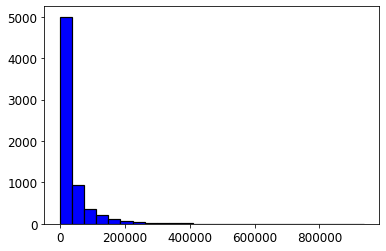

In [5]:
plt.hist(df.gross/1000,color='b',edgecolor='black', linewidth=1.2, bins=25)
plt.xlabel("", fontsize=12)  
plt.ylabel("", fontsize=12,rotation=0)
plt.xticks(fontsize=12)  
plt.yticks(fontsize=12)

### Q.2.2

In [6]:
gross_log = np.log(df.gross)
d = {'gross_log':gross_log}
Gross_log = pd.DataFrame(data=d)
Gross_log.head()

,gross_log
0,10.788948
1,12.959280
2,14.528911
3,14.694436
4,18.496890


Text(0, 0.5, 'gross_log')

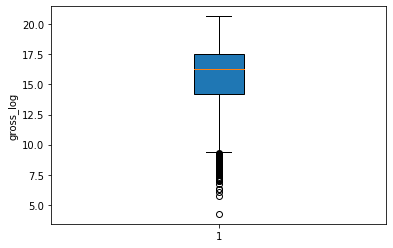

In [7]:
plt.boxplot(Gross_log.gross_log ,meanline=True ,vert=True ,patch_artist=True ,autorange=False)
plt.ylabel("gross_log")

(array([   0.,  200.,  400.,  600.,  800., 1000.]),
 <a list of 6 Text yticklabel objects>)

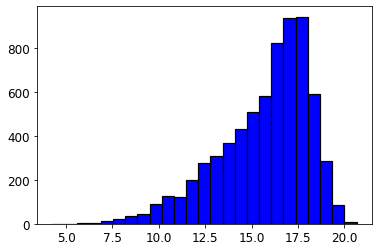

In [8]:
plt.hist(Gross_log['gross_log'],color='b',edgecolor='black', linewidth=1.2, bins=25)
plt.xlabel("", fontsize=12)  
plt.ylabel("", fontsize=12,rotation=0)
plt.xticks(fontsize=12)  
plt.yticks(fontsize=12)

### Q.2.3

In [9]:
print("Budget Feature:")
print("min: " , df.budget.min())
print("max: " , f'{df.budget.max():,}')

Budget Feature:
min:  6000.0
max:  300,000,000.0


C:\Users\Omri\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Omri\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([   0.,  200.,  400.,  600.,  800., 1000., 1200., 1400., 1600.]),
 <a list of 9 Text yticklabel objects>)

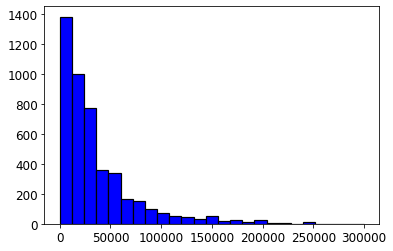

In [10]:
plt.hist(df.budget/1000,color='b',edgecolor='black', linewidth=1.2, bins=25)
plt.xlabel("", fontsize=12)  
plt.ylabel("", fontsize=12,rotation=0)
plt.xticks(fontsize=12)  
plt.yticks(fontsize=12)

(array([  3.,   0.,   3.,   5.,   5.,   5.,  10.,   8.,  19.,   8.,  26.,
         67.,  49.,  87., 149., 295., 296., 509., 753., 689., 673., 503.,
        255., 168.,  53.]),
 array([ 8.69951475,  9.13230588,  9.56509701,  9.99788814, 10.43067927,
        10.86347041, 11.29626154, 11.72905267, 12.1618438 , 12.59463493,
        13.02742606, 13.46021719, 13.89300832, 14.32579946, 14.75859059,
        15.19138172, 15.62417285, 16.05696398, 16.48975511, 16.92254624,
        17.35533738, 17.78812851, 18.22091964, 18.65371077, 19.0865019 ,
        19.51929303]),
 <a list of 25 Patch objects>)

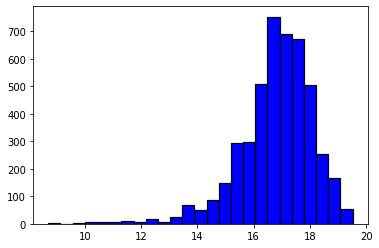

In [11]:
d = np.log(df.budget)
plt.hist(d,color='b',edgecolor='black', linewidth=1.2, bins=25)

In [12]:
Gross_log['Budget_log'] = np.log(df.budget)
Gross_log.head()

,gross_log,Budget_log
0,10.788948,8.699515
1,12.959280,8.853665
2,14.528911,8.853665
3,14.694436,9.615805
4,18.496890,9.615805


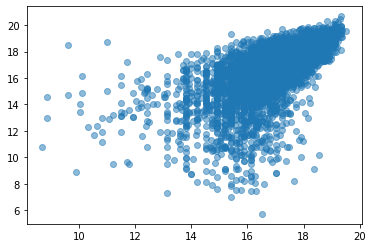

In [13]:
plt.scatter(Gross_log.Budget_log, Gross_log.gross_log, alpha=0.5)
plt.show()

### Q.2.4 - categorical features: genre, realesed , country

### Q.2.5

In [14]:
d = df.groupby('genre').count()
dd = pd.DataFrame(pd.Series(d['name']))
dd['rate'] =  dd['name']/dd['name'].sum()
dd

,name,rate
genre,,
Action,1331,0.195161
Adventure,392,0.057478
Animation,277,0.040616
Biography,359,0.052639
Comedy,2080,0.304985
Crime,522,0.076540
Drama,1444,0.211730
Family,14,0.002053
Fantasy,32,0.004692


In [15]:
ds = dd.reset_index()
v = ds.loc[ds.rate <= 0.05,:]
low_genre = v['genre']
low_genre.values


array(['Animation', 'Family', 'Fantasy', 'Horror', 'Musical', 'Mystery',
       'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western'], dtype=object)

In [16]:
df['genre_group'] = df['genre']
df.loc[df['genre_group'].isin(low_genre.values),'genre_group'] = 'other'
df

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,genre_group
0,6000.0,Next Wave Films,UK,Christopher Nolan,Crime,48482,Following,R,11/5/1999,69,7.6,Jeremy Theobald,72113,Christopher Nolan,1998,Crime
1,7000.0,ERBP,USA,Shane Carruth,Drama,424760,Primer,PG-13,5/27/2005,77,6.9,Shane Carruth,81468,Shane Carruth,2004,Drama
2,7000.0,Columbia Pictures Corporation,USA,Robert Rodriguez,Action,2040920,El Mariachi,R,2/26/1993,81,6.9,Carlos Gallardo,55226,Robert Rodriguez,1992,Action
3,15000.0,Can I Watch,USA,Rose Troche,Drama,2408311,Go Fish,R,7/8/1994,83,5.6,V.S. Brodie,1742,Rose Troche,1994,Drama
4,15000.0,Solana Films,USA,Oren Peli,Horror,107918810,Paranormal Activity,R,10/16/2009,86,6.3,Katie Featherston,195668,Oren Peli,2007,other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6815,NaN,Inimitable Pictures,USA,David Kaplan,Comedy,400654,Today's Special,R,11/11/2009,99,6.7,Kevin Breznahan,4749,Aasif Mandvi,2009,Comedy
6816,NaN,John Aaron Features II Inc.,Canada,Aaron Kim Johnston,Romance,121548,For the Moment,PG-13,4/19/1996,100,6.3,Russell Crowe,821,Aaron Kim Johnston,1993,other
6817,NaN,Playhouse International Pictures,UK,Philip Haas,Drama,5304000,Angels and Insects,R,1/26/1996,116,7.0,Mark Rylance,4083,A.S. Byatt,1995,Drama
6818,NaN,Renaissance Films,UK,Rose Troche,Drama,319125,The Safety of Objects,R,10/24/2003,121,6.6,Glenn Close,3853,A.M. Homes,2001,Drama


### Q.2.6

In [17]:
import datetime as dt

df['released'] = pd.to_datetime(df['released'], format='%m/%d/%Y', errors='coerce')
df['month_release'] = pd.DatetimeIndex(df['released']).month
df['dayOfweek_release'] = pd.DatetimeIndex(df['released']).dayofweek
df

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,genre_group,month_release,dayOfweek_release
0,6000.0,Next Wave Films,UK,Christopher Nolan,Crime,48482,Following,R,1999-11-05,69,7.6,Jeremy Theobald,72113,Christopher Nolan,1998,Crime,11.0,4.0
1,7000.0,ERBP,USA,Shane Carruth,Drama,424760,Primer,PG-13,2005-05-27,77,6.9,Shane Carruth,81468,Shane Carruth,2004,Drama,5.0,4.0
2,7000.0,Columbia Pictures Corporation,USA,Robert Rodriguez,Action,2040920,El Mariachi,R,1993-02-26,81,6.9,Carlos Gallardo,55226,Robert Rodriguez,1992,Action,2.0,4.0
3,15000.0,Can I Watch,USA,Rose Troche,Drama,2408311,Go Fish,R,1994-07-08,83,5.6,V.S. Brodie,1742,Rose Troche,1994,Drama,7.0,4.0
4,15000.0,Solana Films,USA,Oren Peli,Horror,107918810,Paranormal Activity,R,2009-10-16,86,6.3,Katie Featherston,195668,Oren Peli,2007,other,10.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6815,NaN,Inimitable Pictures,USA,David Kaplan,Comedy,400654,Today's Special,R,2009-11-11,99,6.7,Kevin Breznahan,4749,Aasif Mandvi,2009,Comedy,11.0,2.0
6816,NaN,John Aaron Features II Inc.,Canada,Aaron Kim Johnston,Romance,121548,For the Moment,PG-13,1996-04-19,100,6.3,Russell Crowe,821,Aaron Kim Johnston,1993,other,4.0,4.0
6817,NaN,Playhouse International Pictures,UK,Philip Haas,Drama,5304000,Angels and Insects,R,1996-01-26,116,7.0,Mark Rylance,4083,A.S. Byatt,1995,Drama,1.0,4.0
6818,NaN,Renaissance Films,UK,Rose Troche,Drama,319125,The Safety of Objects,R,2003-10-24,121,6.6,Glenn Close,3853,A.M. Homes,2001,Drama,10.0,4.0


#### making quartrly realese column from month realese column:

In [18]:
bins = [0, 3, 6, 9, 12]

df['quarterly_release']=pd.cut(df['month_release'], bins,labels=False)
df.head(n=10)

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,genre_group,month_release,dayOfweek_release,quarterly_release
0,6000.0,Next Wave Films,UK,Christopher Nolan,Crime,48482,Following,R,1999-11-05,69,7.6,Jeremy Theobald,72113,Christopher Nolan,1998,Crime,11.0,4.0,3.0
1,7000.0,ERBP,USA,Shane Carruth,Drama,424760,Primer,PG-13,2005-05-27,77,6.9,Shane Carruth,81468,Shane Carruth,2004,Drama,5.0,4.0,1.0
2,7000.0,Columbia Pictures Corporation,USA,Robert Rodriguez,Action,2040920,El Mariachi,R,1993-02-26,81,6.9,Carlos Gallardo,55226,Robert Rodriguez,1992,Action,2.0,4.0,0.0
3,15000.0,Can I Watch,USA,Rose Troche,Drama,2408311,Go Fish,R,1994-07-08,83,5.6,V.S. Brodie,1742,Rose Troche,1994,Drama,7.0,4.0,2.0
4,15000.0,Solana Films,USA,Oren Peli,Horror,107918810,Paranormal Activity,R,2009-10-16,86,6.3,Katie Featherston,195668,Oren Peli,2007,other,10.0,4.0,3.0
5,20000.0,Professor Bright Films,USA,Ben Coccio,Drama,7221,Zero Day,UNRATED,2004-01-23,92,7.3,Cal Robertson,3594,Ben Coccio,2003,Drama,1.0,4.0,0.0
6,22769.0,Desperate Pictures,USA,Gregg Araki,Comedy,692585,The Living End,UNRATED,1992-08-21,81,6.5,Mike Dytri,2140,Gregg Araki,1992,Comedy,8.0,4.0,2.0
7,23000.0,Detour Filmproduction,USA,Richard Linklater,Comedy,1228108,Slacker,R,1991-07-05,97,7.1,Richard Linklater,16396,Richard Linklater,1991,Comedy,7.0,4.0,2.0
8,25000.0,Alliance Atlantis Communications,Canada,Neil LaBute,Comedy,2856622,In the Company of Men,R,1997-08-01,97,7.3,Aaron Eckhart,11992,Neil LaBute,1997,Comedy,8.0,4.0,2.0
9,25000.0,Brothers McMullen Productions,USA,Edward Burns,Comedy,10246600,The Brothers McMullen,R,1995-08-09,98,6.6,Jack Mulcahy,6598,Edward Burns,1995,Comedy,8.0,2.0,2.0


### Q.2.7 

#### categorical features: genre_group, dayOfweek_release, quarterly_release, country

In [19]:
df.shape

(6820, 19)

In [20]:
def create_dummies(df,column_name):
    dummies = pd.get_dummies(df[column_name],prefix=column_name)
    df = pd.concat([df,dummies],axis=1)
    return df

df = create_dummies(df,"genre_group")
df = create_dummies(df,"dayOfweek_release")
df = create_dummies(df,"quarterly_release")
df = create_dummies(df,"country")

df

,budget,company,country,director,genre,gross,name,rating,released,runtime,...,country_Soviet Union,country_Spain,country_Sweden,country_Switzerland,country_Taiwan,country_Thailand,country_UK,country_USA,country_Ukraine,country_West Germany
0,6000.0,Next Wave Films,UK,Christopher Nolan,Crime,48482,Following,R,1999-11-05,69,...,0,0,0,0,0,0,1,0,0,0
1,7000.0,ERBP,USA,Shane Carruth,Drama,424760,Primer,PG-13,2005-05-27,77,...,0,0,0,0,0,0,0,1,0,0
2,7000.0,Columbia Pictures Corporation,USA,Robert Rodriguez,Action,2040920,El Mariachi,R,1993-02-26,81,...,0,0,0,0,0,0,0,1,0,0
3,15000.0,Can I Watch,USA,Rose Troche,Drama,2408311,Go Fish,R,1994-07-08,83,...,0,0,0,0,0,0,0,1,0,0
4,15000.0,Solana Films,USA,Oren Peli,Horror,107918810,Paranormal Activity,R,2009-10-16,86,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6815,NaN,Inimitable Pictures,USA,David Kaplan,Comedy,400654,Today's Special,R,2009-11-11,99,...,0,0,0,0,0,0,0,1,0,0
6816,NaN,John Aaron Features II Inc.,Canada,Aaron Kim Johnston,Romance,121548,For the Moment,PG-13,1996-04-19,100,...,0,0,0,0,0,0,0,0,0,0
6817,NaN,Playhouse International Pictures,UK,Philip Haas,Drama,5304000,Angels and Insects,R,1996-01-26,116,...,0,0,0,0,0,0,1,0,0,0
6818,NaN,Renaissance Films,UK,Rose Troche,Drama,319125,The Safety of Objects,R,2003-10-24,121,...,0,0,0,0,0,0,1,0,0,0


In [21]:
df.shape

(6820, 94)

#### Before dummying, 4 categorical features. After dummying,  70 categorical features.

### Q.2.8

In [22]:
for col in df.columns: 
    print(col) 

budget
company
country
director
genre
gross
name
rating
released
runtime
score
star
votes
writer
year
genre_group
month_release
dayOfweek_release
quarterly_release
genre_group_Action
genre_group_Adventure
genre_group_Biography
genre_group_Comedy
genre_group_Crime
genre_group_Drama
genre_group_other
dayOfweek_release_0.0
dayOfweek_release_1.0
dayOfweek_release_2.0
dayOfweek_release_3.0
dayOfweek_release_4.0
dayOfweek_release_5.0
dayOfweek_release_6.0
quarterly_release_0.0
quarterly_release_1.0
quarterly_release_2.0
quarterly_release_3.0
country_Argentina
country_Aruba
country_Australia
country_Austria
country_Bahamas
country_Belgium
country_Brazil
country_Canada
country_Chile
country_China
country_Colombia
country_Cuba
country_Czech Republic
country_Denmark
country_Federal Republic of Yugoslavia
country_Finland
country_France
country_Germany
country_Greece
country_Hong Kong
country_Hungary
country_Iceland
country_India
country_Indonesia
country_Iran
country_Ireland
country_Israel
countr

In [23]:
data = { 'gross_log': Gross_log['gross_log'] ,
         'budget_log': Gross_log['Budget_log'],
         'genre_group_Action':df['genre_group_Action'],
         'genre_group_Adventure':df['genre_group_Adventure'],
         'genre_group_Biography':df['genre_group_Biography'],
         'genre_group_Comedy':df['genre_group_Comedy'],
         'genre_group_Crime':df['genre_group_Crime'],
         'genre_group_Drama':df['genre_group_Drama'],
         'genre_group_other':df['genre_group_other'],
         'dayOfweek_release_0.0': df['dayOfweek_release_0.0'],
        'dayOfweek_release_1.0': df['dayOfweek_release_1.0'],
        'dayOfweek_release_2.0': df['dayOfweek_release_2.0'],
        'dayOfweek_release_3.0': df['dayOfweek_release_3.0'],
        'dayOfweek_release_4.0': df['dayOfweek_release_4.0'],
        'dayOfweek_release_5.0': df['dayOfweek_release_5.0'],
        'dayOfweek_release_6.0': df['dayOfweek_release_6.0'],
        'quarterly_release_0.0': df['quarterly_release_0.0'],
        'quarterly_release_1.0': df['quarterly_release_1.0'],
        'quarterly_release_2.0': df['quarterly_release_2.0'],
        'quarterly_release_3.0': df['quarterly_release_3.0'],
         'country_USA': df['country_USA']
        
       }

df_model = pd.DataFrame(data)

df_model.head(10)

,gross_log,budget_log,genre_group_Action,genre_group_Adventure,genre_group_Biography,genre_group_Comedy,genre_group_Crime,genre_group_Drama,genre_group_other,dayOfweek_release_0.0,...,dayOfweek_release_2.0,dayOfweek_release_3.0,dayOfweek_release_4.0,dayOfweek_release_5.0,dayOfweek_release_6.0,quarterly_release_0.0,quarterly_release_1.0,quarterly_release_2.0,quarterly_release_3.0,country_USA
0,10.788948,8.699515,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
1,12.959280,8.853665,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,1,0,0,1
2,14.528911,8.853665,1,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,1
3,14.694436,9.615805,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,1,0,1
4,18.496890,9.615805,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,1,1
5,8.884749,9.903488,0,0,0,0,0,1,0,0,...,0,0,1,0,0,1,0,0,0,1
6,13.448186,10.033155,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,1,0,1
7,14.020985,10.043249,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,1,0,1
8,14.865150,10.126631,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
9,16.142457,10.126631,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,1,0,1


In [24]:
df_model.isnull().sum()

gross_log                   0
budget_log               2182
genre_group_Action          0
genre_group_Adventure       0
genre_group_Biography       0
genre_group_Comedy          0
genre_group_Crime           0
genre_group_Drama           0
genre_group_other           0
dayOfweek_release_0.0       0
dayOfweek_release_1.0       0
dayOfweek_release_2.0       0
dayOfweek_release_3.0       0
dayOfweek_release_4.0       0
dayOfweek_release_5.0       0
dayOfweek_release_6.0       0
quarterly_release_0.0       0
quarterly_release_1.0       0
quarterly_release_2.0       0
quarterly_release_3.0       0
country_USA                 0
dtype: int64

In [25]:
df_model = df_model[df_model.budget_log.notnull()]
df_model.isnull().sum()

gross_log                0
budget_log               0
genre_group_Action       0
genre_group_Adventure    0
genre_group_Biography    0
genre_group_Comedy       0
genre_group_Crime        0
genre_group_Drama        0
genre_group_other        0
dayOfweek_release_0.0    0
dayOfweek_release_1.0    0
dayOfweek_release_2.0    0
dayOfweek_release_3.0    0
dayOfweek_release_4.0    0
dayOfweek_release_5.0    0
dayOfweek_release_6.0    0
quarterly_release_0.0    0
quarterly_release_1.0    0
quarterly_release_2.0    0
quarterly_release_3.0    0
country_USA              0
dtype: int64

In [26]:
df_model.to_csv(r'C:\Users\Omri\Desktop\לימודים\שנה ד\סמס א\BigData\movies_ready1.csv')
df_model.shape

(4638, 21)

### 20 features in the model
# Q.3
## Q.3.1 - we have to test the model with new examples to get truelly accuracy
## Q.3.2

In [27]:
# some parameters
train_pct = 0.8       # X = [0,1] splits the data by (100*X)% of the data for training and the remaining (100*(1-X))% for testing
my_seed = np.array([204265557, 305470916, 201377165]).sum()   # random number generation - see 'Reproducibility' below
np.random.seed(my_seed)
# N - number of rows (records/cases) in the dataframe - look at lab / google how to extract this info
rand_idx = np.random.rand(4638)  # google for help about np.random.rand()
# we'll use boolean indexing as we've done at lab
mask = rand_idx < train_pct
df_train = df_model[mask]
# test is the complement of train (mutual exclusive - remember?!)
df_test = df_model[~mask]


## Q.3.3 

In [28]:
df_test.shape

(961, 21)

In [29]:
df_train.shape

(3677, 21)

# Q.4 - The Model
## Q.4.2 - Train

In [30]:
cols = np.array(df_train.columns)
feature_cols = np.delete(cols,0)
X = df_train[feature_cols]
y = df_train['gross_log']

In [31]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()  # define our model
lr.fit(X,y)              # Fit our linear model

print(lr.coef_)
print(lr.intercept_)

[ 0.88658687  0.0341124   0.24287516 -0.06080442  0.14678564 -0.48255821
 -0.20380936  0.32339881  0.93980524  1.64251351  1.69120428  0.05423825
  1.56692137 -0.22998777  1.11475085  1.71375398  1.66722331  1.72296953
  1.6754989   0.72980962]
-2.218433676337515


In [32]:
from sklearn.metrics import mean_squared_error

y_train_pred=lr.predict(X)
print("MSE_train=",round(mean_squared_error(y, y_train_pred),2))
print("RMSE_train=",round(np.sqrt(mean_squared_error(y,y_train_pred)),2))
print("R square train=",lr.score(X,y))

MSE_train= 2.44
RMSE_train= 1.56
R square train= 0.42195924195516754


## Q.4.3

In [33]:
d = {'feature': feature_cols,'coef':lr.coef_}
c = pd.DataFrame(d)
c.sort_values(by='coef',ascending=False)


,feature,coef
17,quarterly_release_2.0,1.722970
15,quarterly_release_0.0,1.713754
10,dayOfweek_release_2.0,1.691204
18,quarterly_release_3.0,1.675499
16,quarterly_release_1.0,1.667223
9,dayOfweek_release_1.0,1.642514
12,dayOfweek_release_4.0,1.566921
14,dayOfweek_release_6.0,1.114751
8,dayOfweek_release_0.0,0.939805
0,budget_log,0.886587


3 most important feature are: 3th quarter realesed, 1st qurter realesed, monday realesed

It is very surprising that budget is just 10th in importance. 
And all of the genres are in the last part of the table which is mean genre is almost no important for increasing gross revenue   

## Q.4.4

In [34]:
X_test = df_test[feature_cols]
y_test = df_test['gross_log']


y_test_pred=lr.predict(X_test)
print("MSE_test_log=",round(mean_squared_error(y_test, y_test_pred),2))
print("RMSE_test=",round(np.sqrt(mean_squared_error(y_test,y_test_pred)),2))
print("R square test=",lr.score(X_test,y_test))

MSE_test_log= 2.79
RMSE_test= 1.67
R square test= 0.4013470976082676


# Q.5 

In [35]:
gross = y_test_pred
gross = np.exp(gross)
print("MSE_test_original=",round(mean_squared_error(np.exp(y_test), gross),2))

MSE_test_original= 3268915932842238.0
